Testando edit Roberto github command line / agora no site do github

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as signal
from pathlib import Path
from scipy.spatial.distance import euclidean
from scipy.signal import medfilt
from scipy.signal import sosfiltfilt, butter

import sys
sys.path.append("../src")
from conversion_mat_to_py import mat2dict, pretty_dict, matobj2dict, dict2ntuple, name_data
from sources_cv2 import defineStartEnd, count_frames
from save_datas import save_data
from data_conversions import acc_to_angle
from filters import filter_butter
from fast_open_data import open_data_filter

# -> Escolher voluntário e chave

* open_data_filter(Voluntary => 1 até 90, key => 'S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2' ...)

In [2]:
S, R, L = open_data_filter(52, key = 'S1_Synched')
S1, R1, L1 = open_data_filter(23, key = 'S1_Synched')

In [48]:
# dados para voluntário 52
estimated_R = [ 30, 330, 585, 740]
estimated_L = [ 100, 330, 595, 790]
estimated_S = [ 140, 264, 365, 570, 647, 725]

sequece_R_L = [1,2,3,4,1]
sequece_S = [1,2,3,1,2,3,1]

In [49]:
sequence = sequece_S.copy()
sequence.extend(sequece_R_L) 
classes = np.unique(sequence)

In [50]:
def sep_modo(data, estimated_data, modo_sequence, classes):
    
    
    V_seq = np.zeros(len(modo_sequence))
    Var_seq = np.zeros(len(modo_sequence))
    Posi_Var_seq = np.zeros(len(modo_sequence))
    V_modo = np.zeros(len(classes))
    Var_modo = np.zeros(len(classes))
    Posi_Var_modo = np.zeros(len(classes))
    
    modo = np.zeros((data.shape))

    for i in range(len(modo_sequence)):
        if i == 0:
            modo[:estimated_data[i]] = modo_sequence[i]
            V_seq[i] = np.mean(np.diff(data[:estimated_data[i]]))
            Var_seq[i] = np.var(np.diff(data[:estimated_data[i]]))
            Posi_Var_seq[i] = np.var(data[:estimated_data[i]])
            
            
        elif i == (len(estimated_data)):
            modo[estimated_data[i-1]:] = modo_sequence[i]
            V_seq[i] = np.mean(np.diff(data[estimated_data[i-1]:]))
            Var_seq[i] = np.var(np.diff(data[estimated_data[i-1]:]))
            Posi_Var_seq[i] = np.var(data[estimated_data[i-1]:])
        
        else:
            modo[estimated_data[i-1]:estimated_data[i]] = modo_sequence[i]
            V_seq[i] = np.mean(np.diff(data[estimated_data[i-1]:estimated_data[i]]))
            Var_seq[i] = np.var(np.diff(data[estimated_data[i-1]:estimated_data[i]]))
            Posi_Var_seq[i] = np.var(data[estimated_data[i-1]:estimated_data[i]])
                    
    for n in range(len(classes)):
        idx = np.where(np.array(modo_sequence) == n+1)[0]
        V_modo[n] = np.mean(np.array(V_seq)[idx])
        Var_modo[n] = np.mean(np.array(Var_seq)[idx])
        Posi_Var_modo[n] = np.mean(np.array(Posi_Var_seq)[idx])
        
    return modo, V_seq, V_modo, Var_seq, Var_modo

In [60]:
modo, V_seq, V_modo, Var_seq, Var_modo = sep_modo(S, estimated_S, sequece_S, classes)

In [61]:
modo_S, V_seq_S, V_modo_S, Var_seq_S, Var_modo_S = sep_modo(S, estimated_S, sequece_S, classes)
modo_L, V_seq_L, V_modo_L, Var_seq_L, Var_modo_L = sep_modo(L, estimated_L, sequece_R_L, classes)
modo_R, V_seq_R, V_modo_R, Var_seq_R, Var_modo_R = sep_modo(R, estimated_R, sequece_R_L, classes)

O sinal do movimento está na escala de 0 à 3 para facilitar a visualização dos modos em relação ao sinal.

In [62]:
freq_amostragem = 120
# Criando vetor de tempo
t = np.linspace(0, len(S) / freq_amostragem, len(S))

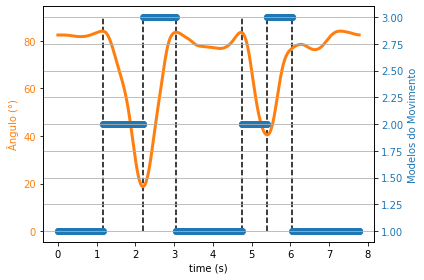

In [63]:
fig, ax1 = plt.subplots()

f_name = 'C:/Users/User/OneDrive/TCC/ema_motion_analysis_imu/Imagens/'

for i in range(len(estimated_S)):
    plt.vlines(x=(estimated_S[i]/(np.array(freq_amostragem))), ymin=0, ymax=90, linestyles ="dashed", colors ="k")

color = 'tab:orange'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Ângulo (°)', color=color)
ax1.plot(t, S, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Modelos do Movimento', color=color) 
ax2.scatter(t, modo, color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 
#plt.legend()
plt.grid()
plt.savefig(f_name + 'Modelos_do_Movimento_tronco_1.png')
plt.show()

In [65]:
modo, V_seq, V_modo, Var_seq, Var_modo = sep_modo(L, estimated_L, sequece_R_L, classes)

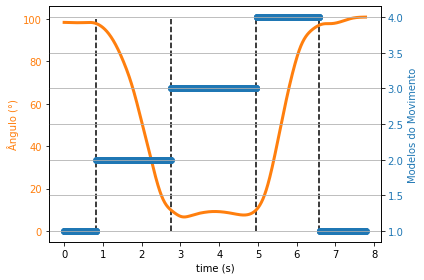

In [66]:
fig, ax1 = plt.subplots()

f_name = 'C:/Users/User/OneDrive/TCC/ema_motion_analysis_imu/Imagens/'

for i in range(len(estimated_L)):
    plt.vlines(x=(estimated_L[i]/(np.array(freq_amostragem))), ymin=0, ymax=100, linestyles ="dashed", colors ="k")

color = 'tab:orange'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Ângulo (°)', color=color)
ax1.plot(t, L, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Modelos do Movimento', color=color) 
ax2.scatter(t, modo, color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 
#plt.legend()
plt.grid()
plt.savefig(f_name + 'Modelos_do_Movimento_perna_esquerda_1.png')
plt.show()

In [9]:
for i in range(len(V_seq)):
    print('Modo: ', sequece_S[i], '--> Média: ', round(V_seq[i], 4))
    
for i in range(len(Var_seq)):
    print('Modo: ', sequece_S[i], '--> Variância: ', round(Var_seq[i], 4))

Modo:  1 --> Média:  0.0117
Modo:  2 --> Média:  -0.5316
Modo:  3 --> Média:  0.649
Modo:  1 --> Média:  -0.0006
Modo:  2 --> Média:  -0.5651
Modo:  3 --> Média:  0.4725
Modo:  1 --> Média:  0.027
Modo:  1 --> Variância:  0.0007
Modo:  2 --> Variância:  0.0749
Modo:  3 --> Variância:  0.106
Modo:  1 --> Variância:  0.0073
Modo:  2 --> Variância:  0.0758
Modo:  3 --> Variância:  0.0765
Modo:  1 --> Variância:  0.0058


Aplicando as médias para cada uma das fases dos movimentos, temos que: 

In [10]:
for i in range(len(V_modo)):
    print('Modo: ', classes[i], '--> Média: ', round(V_modo[i], 4))

for i in range(len(Var_modo)):
    print('Modo: ', classes[i], '--> Variância: ', round(Var_modo[i], 4))

Modo:  1 --> Média:  0.0127
Modo:  2 --> Média:  -0.5484
Modo:  3 --> Média:  0.5607
Modo:  1 --> Variância:  0.0046
Modo:  2 --> Variância:  0.0754
Modo:  3 --> Variância:  0.0912


In [11]:
def generate_model(data, modo, V_modo):
    
    data_model = np.zeros(S.shape)
    for i in range(len(data)):
        if i == 0:
            data_model[i] = data[i]
        else:
            data_model[i] = data[i-1] + V_modo[int(modo[i])-1]
    
    return data_model

In [12]:
data_model = generate_model(S, modo, V_modo)

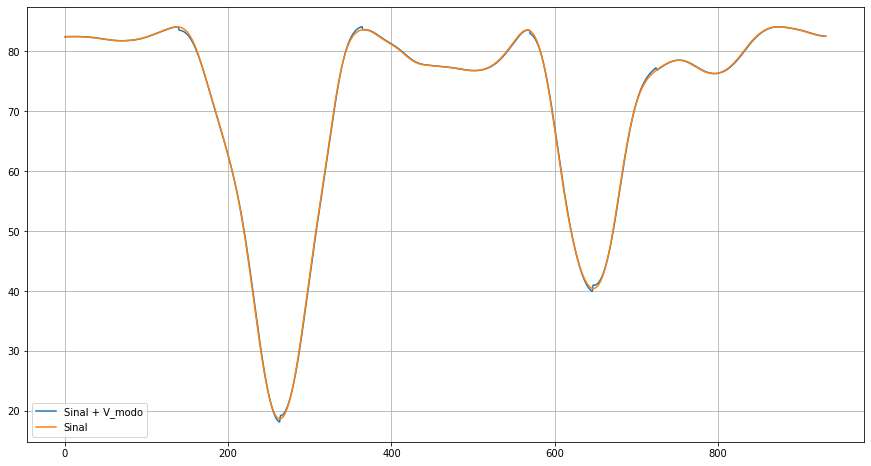

In [13]:
plt.figure(figsize=[15,8])
plt.plot(data_model, label = 'Sinal + V_modo')
plt.plot(S, label = 'Sinal')
plt.legend()
plt.grid()
plt.show()

Separando os modos para os dados de Spine

# Aplicar filtro de Kalman

Capítulos do livro: 
* Cap 7 fala sobre Q_discrete_white_noise
* Cap 8 fala sobre o KalmanFilter
* Cap 14 fala sobre IMM

## Descrição matemática dos cálculos realizados na predicão e atualização do filtro de Kalman

### Predição: 

Estimativa da estado: $ \hat{\mathbf{x}}_{k\mid k-1} = \mathbf{F}_k\hat{\mathbf{x}}_{k-1\mid k-1} + \mathbf{B}_k \mathbf{u}_{k} $

Estimativa de covariância: $\mathbf{P}_{k\mid k-1} = \mathbf{F}_k \mathbf{P}_{k-1 \mid k-1} \mathbf{F}_k^\textsf{T} + \mathbf{Q}_k$


### Atualização: 

Resíduo da medição (pré ajuste de medição): $ \tilde{\mathbf{y}}_k = \mathbf{z}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k\mid k-1} $ 

Resíduo da covariância: $ \mathbf{S}_k = \mathbf{H}_k \mathbf{P}_{k\mid k-1} \mathbf{H}_k^\textsf{T} + \mathbf{R}_k $
 
Ganho ótimo de Kalman: $ \mathbf{K}_k = \mathbf{P}_{k\mid k-1}\mathbf{H}_k^\textsf{T} \mathbf{S}_k^{-1} $

Atualização do estado: $ \hat{\mathbf{x}}_{k\mid k} = \hat{\mathbf{x}}_{k\mid k-1} + \mathbf{K}_k\tilde{\mathbf{y}}_k $

Covariâcia estimada: $ \mathbf{P}_{k|k} = \left(\mathbf{I} - \mathbf{K}_k \mathbf{H}_k\right) \mathbf{P}_{k|k-1} $

Resíduo da medição (pós ajuste de medição): $\tilde{\mathbf{y}}_{k\mid k} = \mathbf{z}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k\mid k} $

In [14]:
from filterpy.kalman import KalmanFilter
from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise
import time

# Escolher as variáveis de estados

Para esse caso, temos duas ou três dimensões de informações (tronco, perna direita e perna esquerda), porém, como o objetivo é utilizar o mínimo de sensores e, sabendo que os dados das pernas são parecidos, será desenvolvido apenas com os dados de tronco e de uma das pernas. Porém, se utilizarmos apenas as informações de posição, o resultado do filtro não é bom, para melhorar, utilizaremos também a informação de velocidade. Considerando os dados de tronco como $x$, sua velocidade $\dot x$ e os dados de perna como $y$ e sua velocidade $\dot y$, podemos representar as variáveis de estados como:

$$\mathbf x = \begin{bmatrix}x & \dot x & y & \dot y\end{bmatrix}^\mathsf T$$

$$\mathbf x = \begin{bmatrix}x & 1 \end{bmatrix}^\mathsf T$$

Existe a possibilidade de criar dados com fusão de sensores (pesquisar caso sobre tempo).

# Função de transição de estados

Para informações de posição e velocidade, a matriz F (modelo de transições de estados) é: 

$$ F = \begin{bmatrix}1& \Delta t& 0& 0\\0& 1& 0& 0\\0& 0& 1& \Delta t\\ 0& 0& 0& 1\end{bmatrix}$$

$$ F = \begin{bmatrix}1& V_s \\0& 1\end{bmatrix}$$

Esse valor se dá através da representação do espaço de estados do modelo dinâmico para velocidade constante. Dessa forma, temos que a função de transição de estados é dada por: 

$$
\begin{bmatrix}x \\ \dot x \\ y \\ \dot y\end{bmatrix} = \begin{bmatrix}1& \Delta t& 0& 0\\0& 1& 0& 0\\0& 0& 1& \Delta t\\ 0& 0& 0& 1\end{bmatrix}\begin{bmatrix}x \\ \dot x \\ y \\ \dot y\end{bmatrix}$$

$$\begin{bmatrix}x \\ \dot x \end{bmatrix} =
\begin{bmatrix}1& V_s \\0& 1\end{bmatrix}
\begin{bmatrix}x \\ 1 \end{bmatrix}^\mathsf T$$

# Matriz de ruído do processo (covariância do ruído do processo)

Para simplificar, podemos considerar uma variância única para cada fase do sinal, dessa forma, a função \italic{Q_discrete_white_noise} calcula automaticamente a matriz Q. 
Segue um exemplo de implementação de Q em que teremos duas variáveis de ruído, uma para cada sensor. 

In [15]:
from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise, kinematic_kf

tracker = kinematic_kf(2, 1)
dt = 1
#print(tracker.Q)
q = Q_discrete_white_noise(dim=2, dt=dt, var=Var_modo_S[0])
q2 = Q_discrete_white_noise(dim=2, dt=dt, var=Var_modo_L[0])
tracker.Q = block_diag(q, q2)
print(tracker.Q)

[[0.00114347 0.00228693 0.         0.        ]
 [0.00228693 0.00457387 0.         0.        ]
 [0.         0.         0.00025708 0.00051416]
 [0.         0.         0.00051416 0.00102831]]


Dessa forma, o ruído de cada sensor pode ser calculado de forma individual para cada sensor e que a matriz Q é dada por: 

$$ Q = \begin{bmatrix}0.00114& 0.00229& 0& 0\\0.00229& 0.00457& 0& 0\\0& 0& 0.00026& 0.00051\\ 0& 0& 0.00051& 0.00103\end{bmatrix}$$


# Função de controle

A função de controle (B) não está sendo implementada. 

# Função de medição (Modelo de observação)

Essa função define a forma que vamos das variáveis de estados às medições atravez da função $\mathbf z = \mathbf{Hx}$. Sabendo que a dimensão das variáveis de estados ($x$) é 4 x 1 e que temos as medias ($z$) de x e y, ou seja, 2 x 1, sabendo dos conceitos de multiplicações de matrizes, temos que a matriz do modelo de observação deve ser 4 x 1.

Preenchendo os valores de $H$, queremos preencher apenas os valores de posição para cada um dos sensores, dessa forma temos que: 

$$\mathbf H =
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

Caso fosse necessário alguma conversão na medida, os valores 1 na matriz deveriam ser alterados realizando essa conversão. 

# Matriz de ruído da medição

Assumindo que os dados do tronco e da perna sejam processos gaussianos brancos independentes, ou seja, o ruído do sensor do tronco não afeta o ruído do sensor da perna e que o ruído é distribuído com média = 0. Dessa forma, temos que: 

$$\mathbf R = \begin{bmatrix}\sigma_x^2 & \sigma_y\sigma_x \\ \sigma_x\sigma_y & \sigma_{y}^2\end{bmatrix}$$






In [16]:
print('Variância X = Tronco: ', Var_modo_S[0])
print('Variância Y = Perna: ',Var_modo_L[0])

Variância X = Tronco:  0.004573867774900928
Variância Y = Perna:  0.001028310926910703


Observando os valores da variância inicial de x e y, que seriam dos dados do tronco e da perna respectivamente, temos que: 

$$\mathbf R = \begin{bmatrix}0.00457&0\\0&0.00103\end{bmatrix}$$

É uma matriz 2 x 2 pois são apenas duas variáveis de entrada, dois sensores. 

In [17]:
print('Posição X = Tronco: ',S[0])
print('Velocidade X = Tronco: ',V_modo_S[0])
print('Posição Y = Perna: ',L[0])
print('Velocidade Y = Perna: ',V_modo_L[0])

Posição X = Tronco:  82.46515494127495
Velocidade X = Tronco:  0.01271414076962181
Posição Y = Perna:  98.36039463205664
Velocidade Y = Perna:  0.006979226934769697


# Condições Iniciais (P) -> Matriz de covariância do erro

Como temos uma pevisão razoável mas não exata da posição inicial, vamos escolher um valor nem grande nem muito pequeno, por exemplo o valor 1 (exemplo de valor grande = 500, caso não tenha uma previsão de valor inicial; exemplo de valor pequeno = 0.00001, caso tenho uma previsão de valor inicial precisa). Dessa forma, temos que: 

$$ \mathbf x = \begin{bmatrix}82.46515\\0.01271\\98.36039\\0.00698\end{bmatrix}, \,
\mathbf P = \begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1\end{bmatrix}$$

# Aplicando os dados do exemplo acima, temos:

In [18]:
dt = 1
kf = kinematic_kf(2, 1, dt=dt)

In [19]:
p = 1

kf.x = np.array([[82.46515, 0.01271, 98.36039, 0.00698]]).T

Q_S = Q_discrete_white_noise(dim=2, dt=dt, var=Var_modo_S[0])
Q_L = Q_discrete_white_noise(dim=2, dt=dt, var=Var_modo_L[0])
kf.Q = block_diag(Q_S, Q_L)

kf.R = np.array([[Var_modo_S[0], 0],
                 [0, Var_modo_L[0]]])

kf.P *= p

results = []
results_priori = []
z = np.c_[S, L]

for i, z in enumerate(z):
    
    # perform predict/update cycle
    kf.predict()  
    results_priori.append(kf.x_prior.copy())
    
    kf.update(z)
    
    results.append(kf.x.copy())
    #prob_estado.append(kf.mu.copy())
    
results = np.array(results)
results_priori = np.array(results_priori)

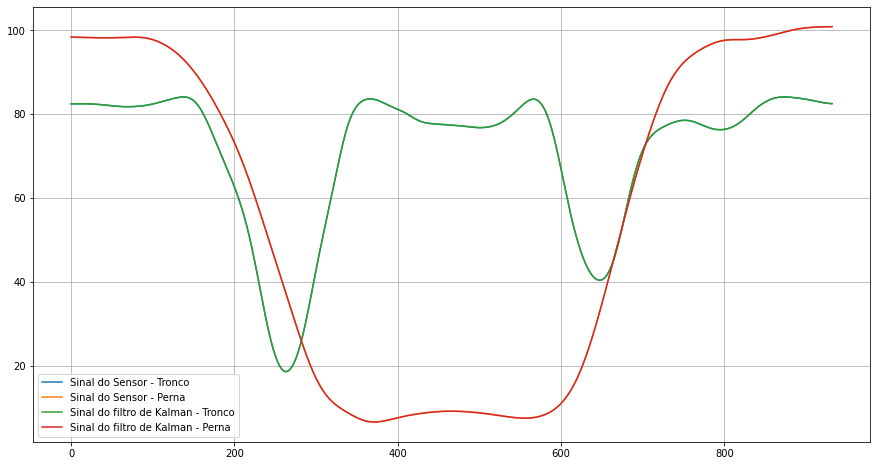

In [20]:
plt.figure(figsize=[15,8])
plt.plot(S, label = 'Sinal do Sensor - Tronco')
plt.plot(L, label = 'Sinal do Sensor - Perna')
plt.plot(results[:,0], label = 'Sinal do filtro de Kalman - Tronco')
plt.plot(results[:,2], label = 'Sinal do filtro de Kalman - Perna')
plt.legend()
plt.grid()
plt.show()

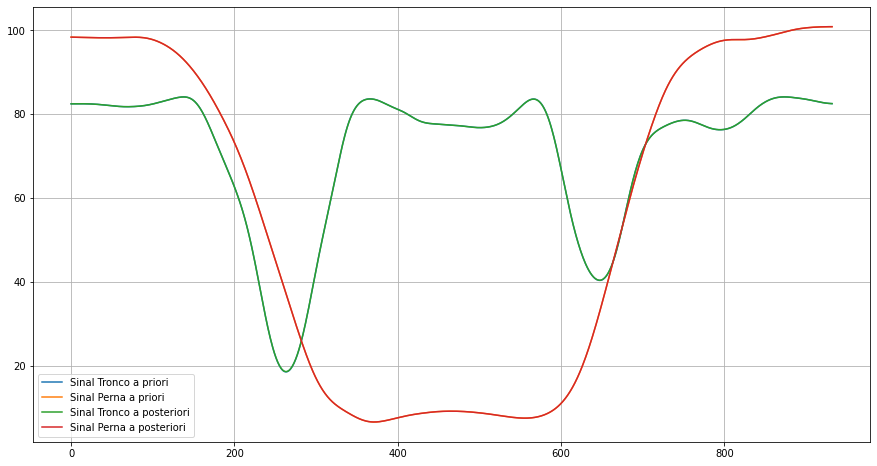

In [21]:
plt.figure(figsize=[15,8])
plt.plot(results_priori[:,0], label = 'Sinal Tronco a priori')
plt.plot(results_priori[:,2], label = 'Sinal Perna a priori')
plt.plot(results[:,0], label = 'Sinal Tronco a posteriori')
plt.plot(results[:,2], label = 'Sinal Perna a posteriori')
plt.legend()
plt.grid()
plt.show()

# Aplicação do filtro de Kalman utilizando estados diferentes de inicialização

In [83]:
def filter_kalman(data, vel, var, c):

    dt = 1
    r = 0.5   #.R = 5
    p = 10.  #.P = 1000.
    
    my_filter = KalmanFilter(dim_x=2, dim_z=1)

    my_filter.x = np.array([data[0],vel])       # initial state (location and velocity)

    my_filter.F = np.array([[1.,1.], [0.,1.]])    # state transition matrix

    my_filter.H = np.array([[1.,0.]])    # Measurement function
    my_filter.P *= p                 # covariance matrix
    my_filter.R = r                      # state uncertainty
    my_filter.Q = Q_discrete_white_noise(2, dt, var) # process uncertainty
        
    i = 0
    data_out = np.zeros(data.shape)
    while i < len(data):
        my_filter.predict()
        my_filter.update(data[i])
        
        # do something with the output
        x = my_filter.x
        data_out[i] = x[0]
        i = i + 1
    
    return data_out

In [84]:
S_filter = np.zeros(S.shape)

i = 0
j = 0
S_sep = []
for n in range(len(classes)):
    S_sep.append([])
while j < len(modo):
    i = j 
    cur_class = modo[i].astype(int)
    
    while modo[j] == cur_class:
        j += 1
        if j >= len(S):
            j = len(S)
            break
            
    idx = np.where(classes==cur_class)[0][0]
    S_sep[idx].append(S[i:j])

    S_filter[i:j] = filter_kalman(S[i:j], V_modo[idx], Var_modo[idx], cur_class)
    
    

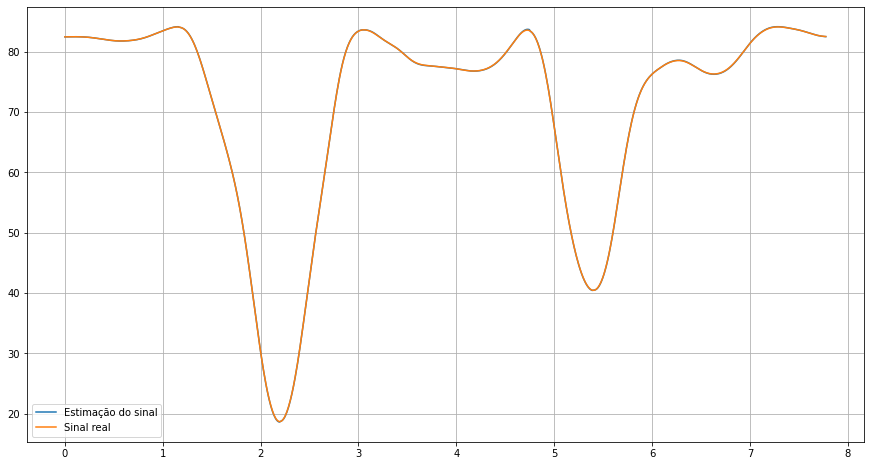

In [85]:
f_name = 'C:/Users/User/OneDrive/TCC/ema_motion_analysis_imu/Imagens/'

t = np.linspace(0, len(S) / 120, len(S))
plt.figure(figsize=[15,8])
plt.plot(t[:], S_filter[:], label = 'Estimação do sinal')
plt.plot(t[:], S[:], label = 'Sinal real')
plt.legend()
plt.grid()
#plt.savefig(f_name + 'Zoom no filtro de kalman.png')
plt.show()

In [86]:
from filterpy.common import kinematic_kf
from filterpy.kalman import IMMEstimator

### Essa matriz de transição deve ser calculada para transição geral do sistema, ou seja, com dados do tronco e perna

In [87]:
def transition_matrix(modo, classes):
    
    transitions = np.zeros(modo.shape)
    not_transitions = np.zeros(modo.shape)
    transition_matrix = np.zeros([len(classes), len(classes)])
    

    for i in range(len(classes)):
        for j in range(len(classes)):
            for n in range(len(modo)-1):
                t = n + 1
                
                if (modo[t-1] == i+1 and modo[t] == j+1):
                    transitions[t] = 1

                else:
                    transitions[t] = 0

                if modo[t] == i+1:
                    not_transitions[t] = 1

                else:
                    not_transitions[t] = 0
            
            transition_matrix[i, j] = np.sum(transitions)/np.sum(not_transitions)
            #plt.plot(transitions, label = 'Transitions: '+str(i)+','+str(j))
            #plt.legend()
            #plt.show()
            #plt.plot(not_transitions, label = 'Not Transitions: '+str(i)+','+str(j))
            #plt.legend()
            #plt.show()
            
    return transition_matrix
        

In [88]:
transitions_S = transition_matrix(modo_S, classes)
transitions_L = transition_matrix(modo_L, classes)
transitions_R = transition_matrix(modo_R, classes)

In [85]:
kf1 = kinematic_kf(2, 1)
kf2 = kinematic_kf(2, 1)
kf3 = kinematic_kf(2, 1)
#kf1 = KalmanFilter(dim_x=2, dim_z=1)
#kf2 = KalmanFilter(dim_x=2, dim_z=1)
#kf3 = KalmanFilter(dim_x=2, dim_z=1)
    
    
dt = 1
r = 1.5   #.R = 5
p = 10000.  #.P = 1000.

# do some settings of x, R, P etc. here, I'll just use the defaults
#kf2.Q *= 0   # no prediction error in second filter


kf1.x = np.array([S[0], L[0], V_modo[0], V_modo_L[0]])       # initial state (location and velocity)

kf1.P *= p                 # covariance matrix
kf1.R *= r                     # state uncertainty
kf1.Q = Q_discrete_white_noise(4, dt, Var_modo[0]) # process uncertainty

kf2.x = np.array([S[140], L[140], V_modo[1], V_modo_L[1]])      # initial state (location and velocity)

kf2.P *= p                 # covariance matrix
kf2.R *= r                     # state uncertainty
kf2.Q = Q_discrete_white_noise(4, dt, Var_modo[1]) # process uncertainty

kf3.x = np.array([S[264], L[264], V_modo[2], V_modo_L[2]])      # initial state (location and velocity)

kf3.P *= p                 # covariance matrix
kf3.R *= r                     # state uncertainty
kf3.Q = Q_discrete_white_noise(4, dt, Var_modo[2]) # process uncertainty

#print(kf1, kf2, kf3)
filters = [kf1, kf2, kf3]
mu = [0.9, 0.05, 0.05]  # each filter is equally likely at the start
M = np.array([[0.99637681, 0.00362319, 0.        ], 
              [0.        , 0.99004975, 0.00995025], 
              [0.01117318, 0.        , 0.98882682]])
imm = IMMEstimator(filters, mu, M)

''' ------------------------------------------------------------- '''
results = []
prob_estado = []
transitions = []
z = np.c_[S, L]

for i, z in enumerate(z):
    
    # perform predict/update cycle
    imm.predict()
    imm.update(z)
    #print((imm.x.T).shape)
    results.append(imm.x.copy())
    prob_estado.append(imm.mu.copy())
    
results = np.array(results)
prob_estado = np.array(prob_estado)
transitions = np.array(transitions)

''' -------------------------------------------------------------- '''

#zs = np.zeros((S.shape[0], 2))
#z = np.c_[S[:328], L[:328]]
#xs, probs = [], []
#for i, z in enumerate(z):

#    bank.predict()
#    bank.update(z)

#    xs.append(bank.x.copy())
#    probs.append(bank.mu.copy())

#xs = np.array(xs)
#probs = np.array(probs)
#plt.figure(figsize=[15,8])
#plt.subplot(121)
#plt.plot(xs[:,0], 'k')
#plt.plot(xs[:,2], 'k')
#z = np.c_[S[:328], L[:328]]
#plt.scatter(z[:, 1], z[:, 0], marker='+')

#plt.subplot(122)
#plt.plot(probs[:, 0])
#plt.plot(probs[:, 1])
#plt.plot(probs[:, 2])
#plt.ylim(-1.5, 1.5)
#plt.title('probability ratio p(cv)/p(ca)');


' -------------------------------------------------------------- '

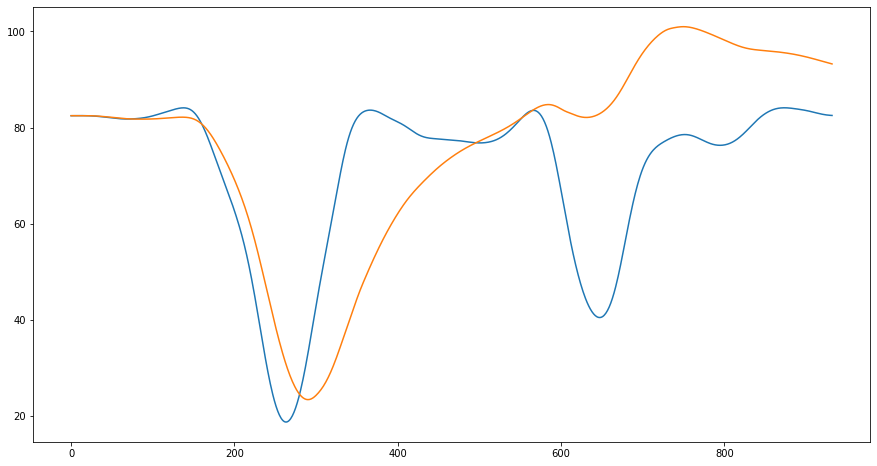

In [86]:
plt.figure(figsize=[15,8])
plt.plot(S)
plt.plot(results[:,0])
#plt.plot(results[:,1])

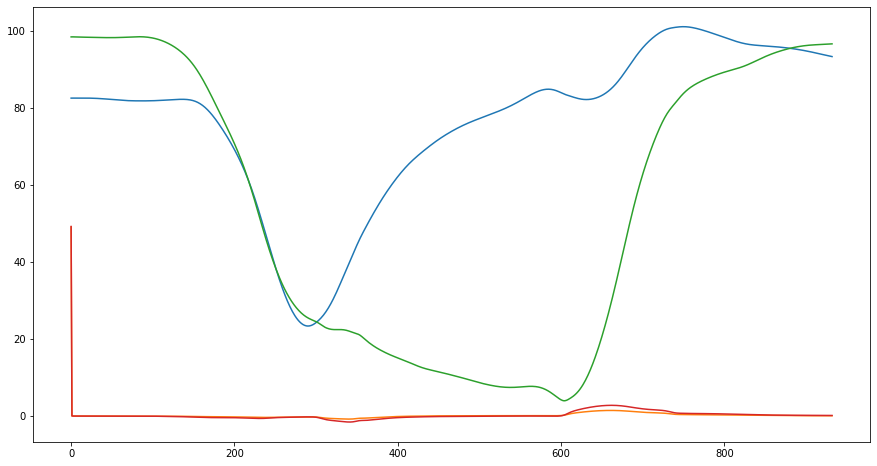

In [87]:
plt.figure(figsize=[15,8])
plt.plot(results)

In [88]:
max((S-results[:,0]))

38.54689470648167

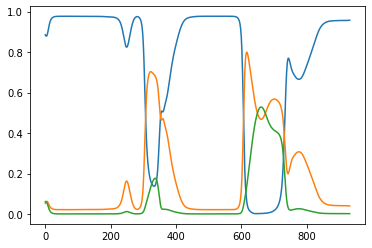

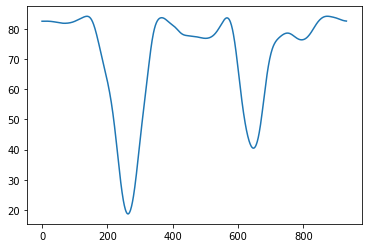

In [89]:
plt.plot(prob_estado)
plt.show()
plt.plot(S)
plt.show()